Libraries used

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from IPython.display import clear_output

import functions_new_jit as func
import importlib
importlib.reload(func)

import numba
from numba import cuda

Histogram of a threshold distribution according to a normal distribution

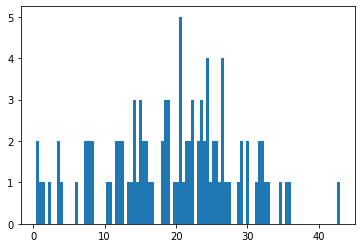

In [2]:
N = 100            # number of Agents
average = 20       # average value of the normal distribution
deviation = 10     # standard deviation of the normal distribution

thresholds = np.array([])
thresholds = func.create_thresholds(N,average,deviation)

# plot
plt.figure()
plt.hist(thresholds,100)
plt.show()

Riot evolution plot

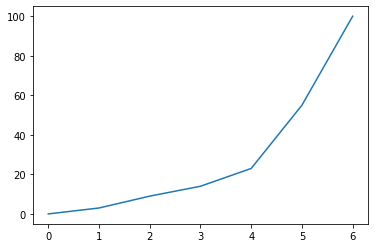

In [3]:
N = 100            # number of Agents
average = 25       # average value of the normal distribution
deviation = 12     # standard deviation of the normal distribution

thresholds = func.create_thresholds(N,average,deviation)
riot = func.simulate_riot(thresholds)

plt.figure()
plt.plot(riot)
plt.show()

Average size of a riot according to the deviation value of the normal distribution of thresholds

100.00%


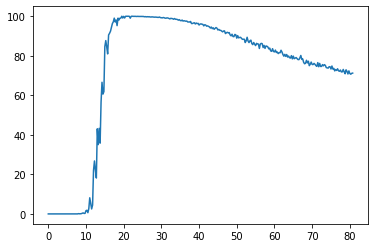

In [4]:
N = 100            # number of Agents
a = True           # negative thresholds are converted to 0
average = 25       # average value of the normal distribution

deviations = np.arange(0,81,0.25) # standard deviations of the normal distribution
simulations = 100                 # number of simulations per standard deviation value
averages = np.array([])

thresholds = np.array([])

for i in deviations:         # a set of simulations per standard deviation value
    average_size = 0
    clear_output(wait=True)
    print(str("%.2f" % ((i/80.75)*100)+"%"), end="\n")
    
    for j in range(simulations):   # riot simulation
        thresholds = func.create_thresholds(N,average,int(i))
        riot = func.simulate_riot(thresholds)
        average_size += riot[-1]
    
    average_size = average_size/simulations
    averages = np.append(averages, average_size)

plt.figure()
plt.plot(deviations,averages)
plt.show()

Average size of a riot according to the deviation value of the normal distribution of thresholds

98.77%


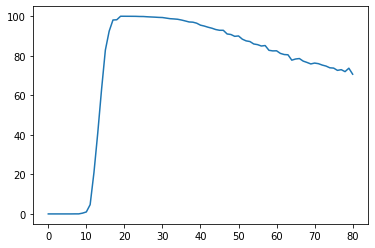

In [5]:
N = 100            # number of Agents
a = True           # negative thresholds are converted to 0
average = 25       # average value of the normal distribution

deviations = np.arange(0,81) # standard deviations of the normal distribution
simulations = 100                 # number of simulations per standard deviation value
averages = np.array([])

thresholds = np.array([])

for i in deviations:         # a set of simulations per standard deviation value
    average_size = 0
    clear_output(wait=True)
    print(str("%.2f" % ((i/81)*100)+"%"), end="\n")
    
    for j in range(simulations):   # riot simulation
        thresholds = func.create_thresholds(N,average,int(i))
        riot = func.simulate_riot(thresholds)
        average_size += riot[-1]
    
    average_size = average_size/simulations
    averages = np.append(averages, average_size)

plt.figure()
plt.plot(deviations,averages)
plt.show()

Heat map of the function: "simulate_riot", given that the x axis corresponds to the threshold distribution average value and the y axis corresponds to it's standard deviation value

In [6]:
# tornar o processo de " graficação" mais rápido com o @njit
@numba.njit
def graficar_simulate_riot(average_samples, deviations, simulations):
    
    heat_map = np.zeros((len(average_samples),len(deviations)))
    
    for k in averages_sample:

        for i in deviations:         # a set of simulations per standard deviation value
            average_size = 0

            for j in range(simulations):   # riot simulation
                thresholds = func.create_thresholds(N,int(k),int(i))
                riot = func.simulate_riot(thresholds)
                size = riot[-1]
                average_size += size

            average_size = average_size/simulations
            heat_map[i][k] = average_size

    return heat_map

In [7]:
@numba.njit(parallel=True)
def graficar_simulate_riot_2_a(a, average_samples, deviations, simulations):
    
    heat_map = np.zeros((len(average_samples),len(deviations)))
    
    for k in numba.prange(len(average_samples)):
        a += 1
        if a == 2:
            break
        #print(100*k/99)
        average = average_samples[k]
        
        for i in numba.prange(len(deviations)):         # a set of simulations per standard deviation value
            deviation = deviations[i]
            average_size = 0

            for j in numba.prange(simulations):   # riot simulation
                thresholds = func.create_thresholds(N,int(average),int(deviation))
                riot = func.simulate_riot(thresholds)
                size = riot[-1]
                average_size += size

            average_size = average_size/simulations
            heat_map[i][k] = average_size

    return heat_map

In [8]:
@numba.njit(parallel=True)
def graficar_simulate_riot_2(average_samples, deviations, simulations):
    
    heat_map = np.zeros((len(average_samples),len(deviations)))
    
    for k in numba.prange(len(average_samples)):
        #print(100*k/99)
        average = average_samples[k]
        
        for i in numba.prange(len(deviations)):         # a set of simulations per standard deviation value
            deviation = deviations[i]
            average_size = 0

            for j in numba.prange(simulations):   # riot simulation
                thresholds = func.create_thresholds(N,int(average),int(deviation))
                riot = func.simulate_riot(thresholds)
                size = riot[-1]
                average_size += size

            average_size = average_size/simulations
            heat_map[i][k] = average_size

    return heat_map

In [9]:
@numba.cuda.jit()
def graficar_simulate_riot_3(a, average_samples, deviations, simulations):
    
    heat_map = np.zeros((len(average_samples),len(deviations)))
    
    for k in range(len(average_samples)):
        a += 1
        if a == 2:
            break
        #print(k)
        average = average_samples[k]
        
        for i in range(len(deviations)):         # a set of simulations per standard deviation value
            deviation = deviations[i]
            average_size = 0

            for j in range(simulations):   # riot simulation
                thresholds = func.create_thresholds(N,int(average),int(deviation))
                riot = func.simulate_riot(thresholds)
                size = riot[-1]
                average_size += size

            average_size = average_size/simulations
            heat_map[i][k] = average_size

    return heat_map

0.0
1.0101010101010102
2.0202020202020203
3.0303030303030303
4.040404040404041
5.05050505050505
6.0606060606060606
7.070707070707071
8.080808080808081
9.090909090909092
10.1010101010101
11.11111111111111
12.121212121212121
13.131313131313131
14.141414141414142
15.151515151515152
16.161616161616163
17.171717171717173
18.181818181818183
19.19191919191919
20.2020202020202
21.21212121212121
22.22222222222222
23.232323232323232
24.242424242424242
25.252525252525253
26.262626262626263
27.272727272727273
28.282828282828284
29.292929292929294
30.303030303030305
31.31313131313131
32.323232323232325
33.333333333333336
34.343434343434346
35.35353535353536
36.36363636363637
37.37373737373738
38.38383838383838
39.39393939393939
40.4040404040404
41.41414141414141
42.42424242424242
43.43434343434343
44.44444444444444
45.45454545454545
46.464646464646464
47.474747474747474
48.484848484848484
49.494949494949495
50.505050505050505
51.515151515151516
52.525252525252526
53.535353535353536
54.5454545454545

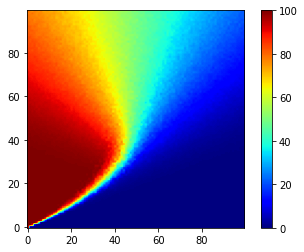

In [66]:
N = 100            # number of Agents

average_max = 100
deviation_max = 100
averages_sample = np.arange(0,average_max)  # average value of the normal distribution
deviations = np.arange(0,deviation_max)       # standard deviations of the normal distribution
simulations = 100                  # number of simulations per standard deviation value

heat_map = graficar_simulate_riot_2(3, averages_sample, deviations, simulations)

plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
plt.colorbar()
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

In [20]:
%time _ =  graficar_simulate_riot(averages_sample, deviations, simulations)

Wall time: 4.62 s


In [77]:
%time _ =  graficar_simulate_riot_2(averages_sample, deviations, simulations)

Wall time: 2.49 s


In [82]:
%time _ =  graficar_simulate_riot_2_a(3, averages_sample, deviations, simulations)

Wall time: 4.14 s


In [47]:
%time _ =  graficar_simulate_riot_3(averages_sample, deviations, simulations)

ValueError: 
Kernel launch configuration was not specified. Use the syntax:

kernel_function[blockspergrid, threadsperblock](arg0, arg1, ..., argn)

See https://numba.readthedocs.io/en/stable/cuda/kernels.html#kernel-invocation for help.

